In [7]:
from typing import Tuple
import math

def normal_approximation_to_binomial(n: int, p: float) -> Tuple:
  """Returns mu and sigma corresponding to a Binomial(n,p)"""
  mu = p * n
  sigma = math.sqrt(p * (1 - p) * n)
  return mu, sigma

In [23]:
import sys  
sys.path.insert(0, '/Users/eyupsercanuygur/Documents/Software/Repositories/MachineLearning/Machine-Learning-Series/Math/Probability')
from ipynb.fs.defs.ProbabilityOverview import normal_cdf

# The normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

# It's above the threshold if it's not below the threshold
def normal_probability_above(lo: float, mu: float= 0, sigma: float = 1) -> float:
  """The probability that an N(mu, sigma) is greater than lo."""
  return 1 - normal_cdf(lo, mu, sigma)

# It's between if it's less than hi, but not less than lo
def normal_probability_between(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    """The probability that an N(mu, sigma) is between lo and hi."""
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# It's outside if it's not between
def normal_probability_outside(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    """The probability that an N(mu, sigma) is not between lo and hi."""
    return 1 - normal_probability_between(lo, hi, mu, sigma)



In [24]:
from ipynb.fs.defs.ProbabilityOverview import inverse_normal_cdf

def normal_upper_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
    """Returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
    """Returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float,
                            mu: float = 0,
                            sigma: float = 1) -> Tuple[float, float]:
    """
    Returns the symmetric (about the mean) bounds
    that contain the specified probability
    """
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound


In [25]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
(mu_0, sigma_0)

(500.0, 15.811388300841896)

In [26]:
lower_bound, upper_bound = normal_two_sided_bounds(0.95, mu_0, sigma_0)
(lower_bound, upper_bound)

(469.01026640487555, 530.9897335951244)

In [27]:
def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
    """
    How likely are we to see a value at least as extreme as x (in either
    direction) if our values are from an N(mu, sigma)?
    """
    if x >= mu:
        # x is greater than the mean, so the tail is everything greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # x is less than the mean, so the tail is everything less than x
        return 2 * normal_probability_below(x, mu, sigma)

In [28]:
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598835

In [33]:
from typing import List
import random

def run_experiment() -> List[bool]:
    """Flips a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment: List[bool]) -> bool:
    """Using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                      for experiment in experiments
                      if reject_fairness(experiment)])

assert num_rejections == 46

In [34]:
# A/B tests

def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

In [35]:
def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

In [43]:
# This is a sort of hack, since we are getting the standard deviation from the data. However for 
# lot of data this will work, the Bernoulli distribution is come to a close a normal distribution

z = a_b_test_statistic(1000, 200, 1000, 180)
z

-1.1403464899034472

In [45]:
# This is checking the distribution's probability, that we get from the a_b test. It is checking the interval not a 
# direct value.

two_sided_p_value(z) 

0.254141976542236

In [46]:
def B(alpha: float, beta: float) -> float:
    """A normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x: float, alpha: float, beta: float) -> float:
    if x <= 0 or x >= 1:          # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

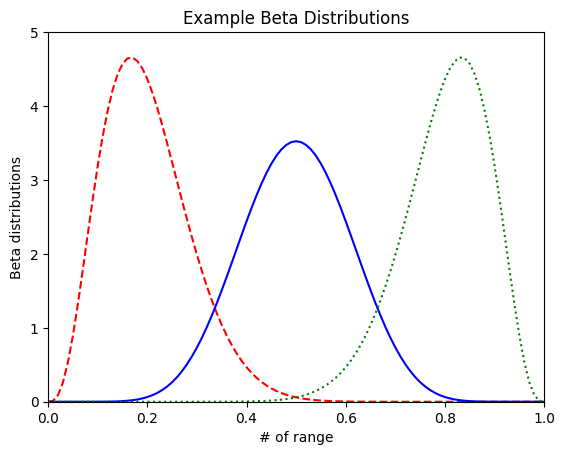

In [83]:
import matplotlib.pyplot as plt

xs = [x * 0.01 for x in range(0, 110)]
ys = []
for x in xs:
  ys.append(beta_pdf(x, 4, 16))
  ys.append(beta_pdf(x, 10, 10))
  ys.append(beta_pdf(x, 16, 4))
plt.plot(xs, ys[0::3], color = "red", linestyle='dashed')
plt.plot(xs, ys[1::3], color = "blue", linestyle='solid')
plt.plot(xs, ys[2::3], color = "green", linestyle='dotted')
plt.axis([0, 1, 0, 5])
plt.title("Example Beta Distributions")
plt.xlabel("# of range")
plt.ylabel("Beta distributions")
plt.show()